In [3]:
# Régression logistique à partir de la collection Iris
# X: longueur sépale, y: setosa ou non
# 25% des données pour test

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Charger les données
iris = datasets.load_iris()
iris_X = iris.data[:,:1] # Colonne longueur de sépale
iris_y = iris.target
iris_y_setosa = (iris_y==0).astype(int) # setosa ou non

# Séparation des données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split
X_ent, X_test, y_ent, y_test = train_test_split(iris_X, iris_y_setosa, test_size=0.25, random_state=0)

# Création du classifieur par régression logistique
classifieur = LogisticRegression()

# Entraînement du modèle sur les données d'entraînement
classifieur.fit(X_ent, y_ent)

# Prédiction des étiquettes pour les données de test
y_pred = classifieur.predict(X_test)

In [5]:
# Évaluation du modèle avec les données de test
print("Taux de bonnes réponses pour test :", accuracy_score(y_test, y_pred))

Taux de bonnes réponses pour test : 0.868421052631579


In [7]:
print("Matrice de confusion:")
matrice_confusion = confusion_matrix(y_test, y_pred, labels=classifieur.classes_)
print(matrice_confusion)

Matrice de confusion:
[[23  2]
 [ 3 10]]


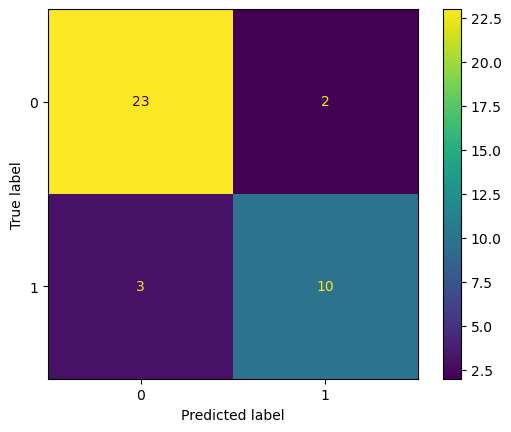

In [9]:
affichage_matrice = ConfusionMatrixDisplay(confusion_matrix=matrice_confusion,
                              display_labels=classifieur.classes_)
affichage_matrice.plot()
plt.show()

In [11]:
print("Rapport de classification:")
print(classification_report(y_test,y_pred))

Rapport de classification:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        25
           1       0.83      0.77      0.80        13

    accuracy                           0.87        38
   macro avg       0.86      0.84      0.85        38
weighted avg       0.87      0.87      0.87        38

